In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

A media company publishes thousands of news articles daily.
Problems they face:
Articles are not consistently tagged
Manual categorization is expensive
New topics emerge frequently
The company wants to:

Automatically group similar news articles
Discover hidden themes without defining categories upfront
Build a content recommendation system
They hire you as a Data Analyst to discover natural article groupings using data — without knowing how many topics exist.
 
1️⃣ Data Understanding & Feature Selection
Load the dataset
Identify the column containing news text
Ignore any sentiment or category labels
Task:
Convert text into numerical form using TF-IDF
Limit features to a reasonable size (e.g., top 500–1000 words)
 
Dendrogram Construction & Analysis
Build a dendrogram using a subset of articles
Observe:

Where large vertical jumps occur

What they indicate about topic separation
 
Apply Hierarchical Clustering
Use Agglomerative Hierarchical Clustering
Choose an appropriate linkage method
 

In [33]:
df=pd.read_csv('all-data.csv',encoding='latin1',header=None)
df.columns=['sentiment','text']

In [34]:
df.isnull().sum()
df.columns
texts=df['text']

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=1000,      # limit features
    stop_words='english'
)

x= vectorizer.fit_transform(texts).toarray()


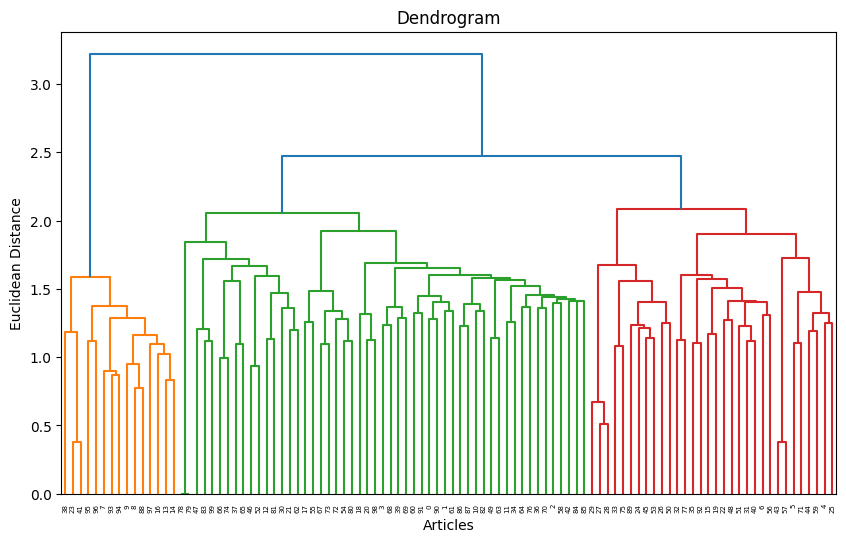

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

x_subset = x[:100]

linked = linkage(x_subset, method='ward')

plt.figure(figsize=(10,6))
dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel("Articles")
plt.ylabel("Euclidean Distance")
plt.show()


In [37]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(
    n_clusters=4,
    metric='euclidean',
    linkage='ward'
)

clusters = hc.fit_predict(x)


In [38]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,clusters)
print('silhouette score for hierarchical clustering',score)

silhouette score for hierarchical clustering 0.009293847788352525
